<a href="https://colab.research.google.com/github/2stndard/polars/blob/main/4%EC%9E%A5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 사전 실행 코드
import polars as pl
import time
import pandas as pd
import numpy as np

In [2]:
pl.DataFrame(
    [
        pl.Series("int_array", [[1,3], [4,6]]),
        pl.Series("string_array", [['a', 'b', 'c'], ['d', 'e', 'f']]),
    ],
    schema={
        "array_1": pl.Array(shape=2, inner=pl.Int64),
        "array_2": pl.Array(shape=3, inner=pl.String)
    }
)

array_1,array_2
"array[i64, 2]","array[str, 3]"
"[1, 3]","[""a"", ""b"", ""c""]"
"[4, 6]","[""d"", ""e"", ""f""]"


In [3]:
pl.DataFrame(
    {
        "int_list": [[1, 3], [4, 6, 8]],
        "string_lists": [['a', 'b', 'c'], ['d', 'e']]
    }
)

int_list,string_lists
list[i64],list[str]
"[1, 3]","[""a"", ""b"", ""c""]"
"[4, 6, 8]","[""d"", ""e""]"


In [4]:
pl.DataFrame(
    pl.Series(
        "등장인물",
        [
            {"name": "홍길동", "나이": 25, "성별": "남"},
            {"name": "성춘향", "나이": 24, "성별": "여"},
            ]
    )
)

등장인물
struct[3]
"{""홍길동"",25,""남""}"
"{""성춘향"",24,""여""}"


In [5]:
from datetime import datetime, date, time
pl.DataFrame(
    {
        "date": [date(1978, 1, 1)],
        "datetime": [datetime(2024, 10, 13, 5, 30, 14, 500_000)],
        "time": [time(5, 30, 14, 500_000)],
        "duration": [
            datetime(2024, 10, 13, 5, 30, 14) -
            datetime(2025, 1, 1, 0, 0, 0)
        ]
    }
)

date,datetime,time,duration
date,datetime[μs],time,duration[μs]
1978-01-01,2024-10-13 05:30:14.500,05:30:14.500,-79d -18h -29m -46s


In [6]:
pl.Series('a', [1, 2, 3])

a
i64
1
2
3


In [7]:
from datetime import date
## 파이썬 리스트의 딕셔너리로 데이터프레임 만들기
pl.DataFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            date(1997, 1, 10),
            date(1985, 2, 15),
            date(1983, 3, 22),
            date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],
        "height": [1.56, 1.77, 1.65, 1.75],
    }
)

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.56
"""Ben Brown""",1985-02-15,72.5,1.77
"""Chloe Cooper""",1983-03-22,53.6,1.65
"""Daniel Donovan""",1981-04-30,83.1,1.75


In [8]:
## 폴라스 시리즈 리스트로 데이터프레임 만들기
df = pl.DataFrame([
        pl.Series("name", ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"]),
        pl.Series("birthdate", [date(1997, 1, 10), date(1985, 2, 15), date(1983, 3, 22), date(1981, 4, 30)]),
        pl.Series("weight", [57.9, 72.5, 53.6, 83.1]),  # (kg)
        pl.Series("height", [1.56, 1.77, 1.65, 1.75])  # (m)
])
df


name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.56
"""Ben Brown""",1985-02-15,72.5,1.77
"""Chloe Cooper""",1983-03-22,53.6,1.65
"""Daniel Donovan""",1981-04-30,83.1,1.75


In [9]:
pl.DataFrame([
    pl.Series("name", ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"]),
    pl.Series("birthdate", [date(1997, 1, 10), date(1985, 2, 15),
                            date(1983, 3, 22), date(1981, 4, 30)]),
    pl.Series("weight", [57.9, 72.5, 53.6, 83.1]),
    pl.Series("height", [1.56, 1.77, 1.65, 1.75])],
             schema = {"name": pl.String, "birthdate" : pl.Date,
                       "weight" : pl.UInt8, "height" : pl.UInt8}
             )

name,birthdate,weight,height
str,date,u8,u8
"""Alice Archer""",1997-01-10,57,1
"""Ben Brown""",1985-02-15,72,1
"""Chloe Cooper""",1983-03-22,53,1
"""Daniel Donovan""",1981-04-30,83,1


In [10]:
(pl.col("weight") / (pl.col("height").pow(2)))

<Expr ['[(col("weight")) / (col("heigh…'] at 0x786F2FB23C50>

In [11]:
exp = (pl.col("weight") / (pl.col("height").pow(2)))
df = df.with_columns(exp.alias("BMI"))
df

name,birthdate,weight,height,BMI
str,date,f64,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694


In [12]:
df.select(
    (pl.col("weight") + 5).alias("weight + 5"),
    (pl.col("height").sub(5)).alias("height - 5"),
    (pl.col("weight") * pl.col("height")).alias("weight * height"),
    (pl.col("height").truediv(pl.col("weight"))).alias("height / weight"),
    (pl.col("BMI") ** 2).alias("BMI ** 2"),
    (pl.col("BMI") % 3).alias("BMI % 3")
)

weight + 5,height - 5,weight * height,height / weight,BMI ** 2,BMI % 3
f64,f64,f64,f64,f64,f64
62.9,-3.44,90.324,0.026943,566.055134,2.791913
77.5,-3.23,128.325,0.024414,535.528943,2.141498
58.6,-3.35,88.44,0.030784,387.608955,1.687787
88.1,-3.25,145.425,0.021059,736.291612,0.134694


In [13]:
df.select(
    (pl.col("height") > 1.6).alias("height > 1.6"),
    (pl.col("weight") >= 60).alias("weight >= 60"),
    (pl.col("BMI") == 20).alias("BMI == 20")
)

height > 1.6,weight >= 60,BMI == 20
bool,bool,bool
false,false,false
true,true,false
true,false,false
true,true,false


In [14]:
df.filter(
    ((pl.col("height") > 1.6).and_(pl.col("weight") >= 60))
)

name,birthdate,weight,height,BMI
str,date,f64,f64,f64
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694


In [15]:
df.select(
    pl.col("height").gt(1.6).alias("height > 1.6"),
    pl.col("weight").ge(60).alias("weight >= 60"),
    pl.col("BMI").eq(20).alias("BMI == 20")
)

height > 1.6,weight >= 60,BMI == 20
bool,bool,bool
false,false,false
true,true,false
true,false,false
true,true,false


In [16]:
df = df.with_columns(
    pl.col("BMI"),
    pl.when(pl.col("BMI") > 23)
    .then(pl.lit("과체중"))
    .otherwise(pl.lit("정상"))
    .alias("BMI 판정"),
)
df

name,birthdate,weight,height,BMI,BMI 판정
str,date,f64,f64,f64,str
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중"""


In [17]:
df.select(
    (pl.col('height', 'weight') * 2).name.suffix('*2')
)

height*2,weight*2
f64,f64
3.12,115.8
3.54,145.0
3.3,107.2
3.5,166.2


In [18]:
df.with_columns(
    (pl.col(pl.Float64) * 2).round(1))

name,birthdate,weight,height,BMI,BMI 판정
str,date,f64,f64,f64,str
"""Alice Archer""",1997-01-10,115.8,3.1,47.6,"""과체중"""
"""Ben Brown""",1985-02-15,145.0,3.5,46.3,"""과체중"""
"""Chloe Cooper""",1983-03-22,107.2,3.3,39.4,"""정상"""
"""Daniel Donovan""",1981-04-30,166.2,3.5,54.3,"""과체중"""


In [19]:
df.select(
    (pl.col('^.*BMI.*$')))

BMI,BMI 판정
f64,str
23.791913,"""과체중"""
23.141498,"""과체중"""
19.687787,"""정상"""
27.134694,"""과체중"""


In [20]:
df.select(
    (pl.all()))

name,birthdate,weight,height,BMI,BMI 판정
str,date,f64,f64,f64,str
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중"""


In [21]:
df = df.with_columns(
    pl.col("BMI").cast(pl.Int64).alias("Int_BMI")
)
df

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI
str,date,f64,f64,f64,str,i64
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27


In [22]:
df.with_columns(
    pl.col("name").str.head(5).alias("string_head"),
    pl.col("name").str.reverse().alias("string_rev")
)

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,string_head,string_rev
str,date,f64,f64,f64,str,i64,str,str
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""Alice""","""rehcrA ecilA"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""Ben B""","""nworB neB"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""Chloe""","""repooC eolhC"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""Danie""","""navonoD leinaD"""


In [23]:
BMI_enum = pl.Enum(["저체중", "정상", "과체중", "비만"])
df = df.with_columns(
    pl.col("BMI 판정").cast(BMI_enum).alias("enum_판정")
)
df

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정
str,date,f64,f64,f64,str,i64,enum
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""정상"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중"""


In [24]:
from polars.exceptions import InvalidOperationError

try:
    pl.Series(
            ["과체중", "비만", "정상", "과체중", "비만전단계"],
            dtype=BMI_enum,
        )

except InvalidOperationError as exc:
    print("InvalidOperationError:", exc)

InvalidOperationError: conversion from `str` to `enum` failed in column '' for 1 out of 5 values: ["비만전단계"]

Ensure that all values in the input column are present in the categories of the enum datatype.


In [25]:
df.sort('enum_판정')

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정
str,date,f64,f64,f64,str,i64,enum
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""정상"""
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중"""


In [26]:
df.filter(
    (pl.col("enum_판정") > "정상")
)

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정
str,date,f64,f64,f64,str,i64,enum
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중"""


In [27]:
df = df.with_columns(
    pl.col('enum_판정').cast(pl.Categorical)
)
df

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정
str,date,f64,f64,f64,str,i64,cat
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""정상"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중"""


In [28]:
df.with_columns(
    pl.when(pl.col('enum_판정') < '정상').then(pl.lit('저체중')).otherwise(pl.lit('비만'))
)

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정,literal
str,date,f64,f64,f64,str,i64,cat,str
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중""","""저체중"""
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중""","""저체중"""
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""정상""","""비만"""
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중""","""저체중"""


In [29]:
df_missing = pl.DataFrame([
        pl.Series("name", ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"]),
        pl.Series("birthdate", [date(1997, 1, 10), None, date(1983, 3, 22), date(1981, 4, 30)]),
        pl.Series("weight", [57.9, 72.5, None, 83.1]),  # (kg)
        pl.Series("height", [None, 1.77, 1.65, float('nan')])  # (m)
])
df_missing

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,null
"""Ben Brown""",null,72.5,1.77
"""Chloe Cooper""",1983-03-22,null,1.65
"""Daniel Donovan""",1981-04-30,83.1,NaN


In [30]:
df_missing.select(pl.all().null_count())

name,birthdate,weight,height
u32,u32,u32,u32
0,1,1,1


In [31]:
df_missing.select(
    pl.col('name').null_count()
)

name
u32
0


In [32]:
df_missing.select(
    pl.col('*').is_null()
)

name,birthdate,weight,height
bool,bool,bool,bool
false,false,false,true
false,true,false,false
false,false,true,false
false,false,false,false


In [33]:
df_missing.select(pl.col('*').drop_nulls())

ComputeError: Series length 3 doesn't match the DataFrame height of 4

In [34]:
df_missing.select(
    pl.col('birthdate').drop_nulls()
)

birthdate
date
1997-01-10
1983-03-22
1981-04-30


In [35]:
df_missing.select(
    pl.col('height').drop_nans()
)

height
f64
null
1.77
1.65


In [36]:
df_missing.select(pl.all().fill_null(0))

InvalidOperationError: got invalid or ambiguous dtypes: '[date, dyn int]' in expression 'fill_null'

Consider explicitly casting your input types to resolve potential ambiguity.

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'select' <---
 SELECT [col("name").fill_null([dyn int: 0]), col("birthdate").fill_null([dyn int: 0]), col("weight").fill_null([0.0]), col("height").fill_null([0.0])] FROM
  DF ["name", "birthdate", "weight", "height"]; PROJECT */4 COLUMNS; SELECTION: None

In [37]:
df_missing.fill_nan(0)

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,null
"""Ben Brown""",null,72.5,1.77
"""Chloe Cooper""",1983-03-22,null,1.65
"""Daniel Donovan""",1981-04-30,83.1,0.0


In [38]:
df_missing.with_columns(
    pl.col('height').fill_null(pl.col('weight')/20).sqrt())

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.70147
"""Ben Brown""",null,72.5,1.330413
"""Chloe Cooper""",1983-03-22,null,1.284523
"""Daniel Donovan""",1981-04-30,83.1,NaN


In [39]:
df_missing.fill_null(strategy="backward")

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.77
"""Ben Brown""",1983-03-22,72.5,1.77
"""Chloe Cooper""",1983-03-22,83.1,1.65
"""Daniel Donovan""",1981-04-30,83.1,NaN


In [40]:
df.select(
    bmi=exp,  ## exp.alias(‘bmi’)와 동일
    avg_bmi=exp.mean(),  ## exp.mean().alias(‘avg_bmi’)와 동일
    ideal_max_bmi=25,  ## pl.lit(25).alias(‘ideal_max_bmi’)와 동일
)

bmi,avg_bmi,ideal_max_bmi
f64,f64,i32
23.791913,23.438973,25
23.141498,23.438973,25
19.687787,23.438973,25
27.134694,23.438973,25


In [41]:
df.with_columns(
    bmi=exp,
    avg_bmi=exp.mean(),
    ideal_max_bmi=25,
)

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정,bmi,avg_bmi,ideal_max_bmi
str,date,f64,f64,f64,str,i64,cat,f64,f64,i32
"""Alice Archer""",1997-01-10,57.9,1.56,23.791913,"""과체중""",23,"""과체중""",23.791913,23.438973,25
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중""",23.141498,23.438973,25
"""Chloe Cooper""",1983-03-22,53.6,1.65,19.687787,"""정상""",19,"""정상""",19.687787,23.438973,25
"""Daniel Donovan""",1981-04-30,83.1,1.75,27.134694,"""과체중""",27,"""과체중""",27.134694,23.438973,25


In [42]:
df.filter(
    (pl.col("birthdate").is_between(date(1982, 12, 31), date(1996, 1, 1))) & (pl.col("height") > 1.7)
)

name,birthdate,weight,height,BMI,BMI 판정,Int_BMI,enum_판정
str,date,f64,f64,f64,str,i64,cat
"""Ben Brown""",1985-02-15,72.5,1.77,23.141498,"""과체중""",23,"""과체중"""


In [43]:
df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
).agg(pl.col("name"))


decade,name
i32,list[str]
1990,"[""Alice Archer""]"
1980,"[""Ben Brown"", ""Chloe Cooper"", ""Daniel Donovan""]"


In [2]:
start = time.time()
pd.DataFrame({
    'Age': np.random.randint(18, 60, 50_000_000),
    'Salary': np.random.randint(30000, 90000, 50_000_000),
    'Gender': np.random.choice(['Male', 'Female'], 50_000_000)
})
end = time.time()
print(end - start)

11.967062950134277


In [4]:
start = time.time()
df_lazy = pl.LazyFrame({
    'Age': np.random.randint(18, 60, 50_000_000),
    'Salary': np.random.randint(30000, 90000, 50_000_000),
    'Gender': np.random.choice(['Male', 'Female'], 50_000_000)
})
end = time.time()
print(end - start)

19.507872343063354


In [5]:
print(df_lazy)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

DF ["Age", "Salary", "Gender"]; PROJECT */3 COLUMNS; SELECTION: None


In [6]:
df_lazy.collect()

Age,Salary,Gender
i64,i64,str
25,44760,"""Female"""
39,56468,"""Female"""
20,61106,"""Female"""
38,35734,"""Female"""
43,51867,"""Female"""
…,…,…
32,30400,"""Female"""
40,55202,"""Male"""
28,38848,"""Male"""


In [7]:
start = time.time()
df_lazy = df_lazy.collect()
end = time.time()
print(end - start)

0.0012629032135009766


In [8]:
context_lazy = df_lazy.filter(pl.col('Gender') == "Male").lazy()
print(context_lazy)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

DF ["Age", "Salary", "Gender"]; PROJECT */3 COLUMNS; SELECTION: None


In [9]:
context_lazy.collect()

Age,Salary,Gender
i64,i64,str
30,63488,"""Male"""
39,89800,"""Male"""
33,65058,"""Male"""
24,31817,"""Male"""
36,81079,"""Male"""
…,…,…
55,89729,"""Male"""
58,60641,"""Male"""
45,33578,"""Male"""


In [11]:
from datetime import date
df_LazyFrame = pl.LazyFrame([
        pl.Series("name", ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"]),
        pl.Series("birthdate", [date(1997, 1, 10), date(1985, 2, 15),
                                date(1983, 3, 22), date(1981, 4, 30)]),
        pl.Series("weight", [57.9, 72.5, 53.6, 83.1]),
        pl.Series("height", [1.56, 1.77, 1.65, 1.75])]
                            )

In [12]:
query = (
    df_LazyFrame.
    with_columns((pl.col("weight") / (pl.col("height") ** 2)).alias("BMI")).
    filter(pl.col('weight') < 70).
    select(pl.col('name', 'BMI'))
    )

In [13]:
print(query.explain(optimized=True))

simple π 2/5 ["name", "BMI"]
   WITH_COLUMNS:
   [[(col("weight")) / (col("height").pow([dyn int: 2]))].alias("BMI")] 
    DF ["name", "birthdate", "weight", "height"]; PROJECT */4 COLUMNS; SELECTION: [(col("weight")) < (70.0)]


In [14]:
print(query.explain(optimized=False))

 SELECT [col("name"), col("BMI")] FROM
  FILTER [(col("weight")) < (70.0)] FROM
     WITH_COLUMNS:
     [[(col("weight")) / (col("height").pow([dyn int: 2]))].alias("BMI")] 
      DF ["name", "birthdate", "weight", "height"]; PROJECT */4 COLUMNS; SELECTION: None


In [15]:
query.explain(optimized=False)

' SELECT [col("name"), col("BMI")] FROM\n  FILTER [(col("weight")) < (70.0)] FROM\n     WITH_COLUMNS:\n     [[(col("weight")) / (col("height").pow([dyn int: 2]))].alias("BMI")] \n      DF ["name", "birthdate", "weight", "height"]; PROJECT */4 COLUMNS; SELECTION: None'

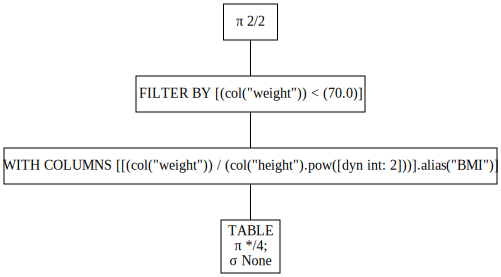

In [16]:
query.show_graph(optimized=False)

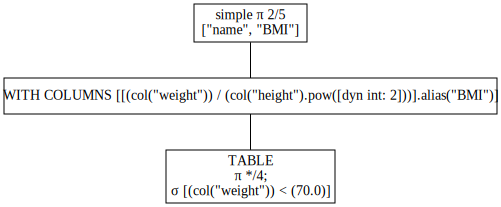

In [17]:
query.show_graph(optimized=True)